# Importação de bibliotecas

In [1]:
import gensim
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

from sklearn.decomposition import PCA

# import nltk
from nltk.corpus import stopwords

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# nltk.download("stopwords")

# Leitura dos textos e pré-processamento

In [3]:
with open("data/Harry_Potter_e_A_Pedra_Filosofal.txt", encoding="utf-8") as f:
    text_content_1 = f.read()

with open("data/Harry_Potter_Camara_Secreta-br.txt", encoding="utf-8") as f:
    text_content_2 = f.read()

In [4]:
stop_words = set(stopwords.words('portuguese'))

def tokenize(text, remove_stopwords=True):
    if remove_stopwords:
        return [word for word in gensim.utils.tokenize(text, lower=True, deacc=True) if word not in stop_words]
    else:
        return list(gensim.utils.tokenize(text, lower=True, deacc=True))

In [5]:
# Tokenização (com lowercase + desacentuação + exclusão de stopwords)
# Nota: Utilizado apenas o conteúdo do primeiro documento nesta fase

sents = []
for sent in text_content_1.splitlines():
    sents.append(tokenize(sent))

# Visualizar as 10 primeiras frases do documento
print("Primeiras 10 frases do documento:")
for sent in sents[:10]:
    print(sent)

Primeiras 10 frases do documento:
['capitulo']
['menino', 'sobreviveu']
[]
['sr', 'sra', 'dursley', 'rua', 'alfeneiros', 'orgulhavam', 'dizer']
['perfeitamente', 'normais', 'bem', 'obrigado', 'ultimas', 'pessoas', 'mundo']
['esperaria', 'metessem', 'alguma', 'coisa', 'estranha', 'misteriosa', 'porque', 'simplesmente', 'nao']
['compactuavam', 'tipo', 'bobagem']
['sr', 'dursley', 'diretor', 'firma', 'chamada', 'grunnings', 'fazia', 'perfuracoes']
['homem', 'alto', 'corpulento', 'quase', 'pescoco', 'embora', 'enormes', 'bigodes', 'sra', 'dursley']
['magra', 'loura', 'pescoco', 'quase', 'duas', 'vezes', 'comprido', 'normal']


# Treino do modelo Word2Vec

In [6]:
model = Word2Vec(sents, vector_size=200, window=5, min_count=1, sg=1, epochs=20, workers=3, seed=13)  # seed fixa para testar o impacto de diferentes hiperparâmetros

In [7]:
def get_word(word, model):
    try:
        return model.wv[word]
    except KeyError:
        print("The word '" + word + "' does not appear in this model")

In [8]:
print(f"Resultado de get_word('dobby'):\n{get_word('dobby', model)}")  # Apenas presente no segundo documento
print("="*50)
print(f"Resultado de get_word('grifinoria'):\n{get_word('grifinoria', model)}")

The word 'dobby' does not appear in this model
Resultado de get_word('dobby'):
None
Resultado de get_word('grifinoria'):
[ 0.17281419 -0.06659344  0.24244146  0.07949327  0.2651499   0.24963562
 -0.25762945 -0.08201496 -0.32088697  0.47353625 -0.04216252 -0.0058521
  0.36709678  0.21413182 -0.00233492 -0.02307616 -0.47031647  0.10711368
 -0.57712126  0.01497441  0.4051933  -0.62729263  0.4445053   0.14431387
 -0.14839078  0.14367318 -0.17379232  0.4519144  -0.20187172 -0.2864373
 -0.01096895  0.09584172 -0.24520703  0.443959    0.2544144   0.421135
  0.03029151  0.19180168  0.16022173  0.05336087  0.2524812   0.4290338
  0.20481598 -0.23769978 -0.06007948  0.10641112  0.41527316 -0.37103328
  0.0440619  -0.64757097 -0.12858573 -0.19012466  0.03836402 -0.05202173
  0.262283    0.30420977 -0.12346392  0.07905804  0.17210136 -0.01510656
 -0.32091445  0.13342305  0.22343567  0.36882153  0.14496332  0.30578786
 -0.00232373  0.09511098  0.00422135  0.32331377  0.18707165  0.02216612
 -0.2922

# Expansão do modelo

In [9]:
print(f"Tamanho da lista de word vectors original: {len(model.wv)}")

# Tokenização do segundo documento
more_sents = []
for sent in text_content_2.splitlines():
    more_sents.append(tokenize(sent))

# Aumento do vocabulário
model.build_vocab(more_sents, update=True)
model.train(more_sents, total_examples=model.corpus_count, epochs=model.epochs)

print(f"Tamanho da lista de word vectors após inclusão do segundo documento: {len(model.wv)}")
print("="*50)
print(f"Novo resultado para get_word('dobby'):\n{get_word('dobby', model)}")

Tamanho da lista de word vectors original: 8102
Tamanho da lista de word vectors após inclusão do segundo documento: 12382
Novo resultado para get_word('dobby'):
[-0.13352375 -0.25767305  0.21208915  0.5314678   0.6709765   0.78561634
 -0.22512645 -0.51448935 -0.18824963  0.4475136  -0.7122984  -0.43016443
 -0.04636244 -0.11132565 -0.38598228 -0.15898108  0.32324016  0.05554712
 -0.17993988  0.42027748 -0.81697845  0.15652587  0.57886684 -0.7884504
 -0.2788667  -0.0764038   0.7662305   0.55288815 -0.05442802  0.12015067
  0.03882013  0.23739283  0.2891681   0.07006934  0.06300704  0.0258284
 -0.15328102  0.03512221 -0.00188557  0.5814414   0.45850384  0.20550798
 -0.08177312 -0.37415332  0.24728952 -0.05376886  0.05858949 -0.7844714
  0.10597841  0.6259669  -0.6404992  -0.43605867  0.45696014 -0.05504003
  0.6888365  -0.06480117 -0.59678334 -0.4456805  -1.5347359   0.01097532
  0.1535674  -0.7899018   0.37852252 -0.19276913  0.37094775 -0.3859848
 -0.38269028 -0.3769297   0.42865434  0

# Análise semântica

In [10]:
# Averiguar que palavras não se enquadram com as outras

print("Palavra que não se enquadra em ['ron', 'hermione', 'harry', 'grifinoria']:", end=" ")
print(model.wv.doesnt_match(["ron", "hermione", "harry", "grifinoria"]))

print("Palavra que não se enquadra em ['gorila', 'lufa', 'sonserina', 'grifinoria']:", end=" ")
print(model.wv.doesnt_match(["gorila", "lufa", "sonserina", "grifinoria"]))  # Nota: Se 'gorila' não fizesse parte do documento não seria selecionado

Palavra que não se enquadra em ['ron', 'hermione', 'harry', 'grifinoria']: hermione
Palavra que não se enquadra em ['gorila', 'lufa', 'sonserina', 'grifinoria']: gorila


In [11]:
# Averiguar que palavras mais se assemelham a um determinado termo

print("Palavras que mais se assemelham a 'harry':")
print(model.wv.most_similar("harry"))

print("Palavras que mais se assemelham a 'sonserina':")
print(model.wv.most_similar("sonserina"))

Palavras que mais se assemelham a 'harry':
[('esgotaria', 0.5789644122123718), ('lenta', 0.5740768313407898), ('hesitante', 0.5733858346939087), ('sorrir', 0.5722559690475464), ('arreganhar', 0.5672870874404907), ('irmazinha', 0.5672402381896973), ('aguentar', 0.5660010576248169), ('adeus', 0.5648831725120544), ('convencer', 0.5639702677726746), ('incredulos', 0.562674343585968)]
Palavras que mais se assemelham a 'sonserina':
[('ansiosas', 0.6817702651023865), ('corvinal', 0.6731259822845459), ('derrotada', 0.6725288033485413), ('superiores', 0.6697354912757874), ('mandam', 0.6660163402557373), ('lendario', 0.6612537503242493), ('marcos', 0.6548489928245544), ('gargalhadas', 0.6546388268470764), ('simbolo', 0.6487402319908142), ('clearwater', 0.6463321447372437)]


In [12]:
# Averiguar que palavras mais se assemelham a um determinado
# conjunto de termos e se afastam de outro conjunto de termos

print("Palavras que mais se assemelham a ['harry', 'grifinoria'] e se afastam de ['snape', 'sonserina']:")
print(model.wv.most_similar(positive=["harry", "grifinoria"], negative=["snape", "sonserina"]))

print("Palavras que mais se assemelham a ['harry'] e se afastam de ['snape', 'draco']:")
print(model.wv.most_similar(positive=["harry"], negative=["snape", "draco"]))

Palavras que mais se assemelham a ['harry', 'grifinoria'] e se afastam de ['snape', 'sonserina']:
[('resto', 0.28705793619155884), ('sentou', 0.27469611167907715), ('dormitorio', 0.2733459174633026), ('seguida', 0.26901793479919434), ('ansioso', 0.2627153992652893), ('acontecera', 0.26065123081207275), ('fome', 0.26012876629829407), ('falta', 0.25775307416915894), ('observando', 0.2562294006347656), ('rouca', 0.25302794575691223)]
Palavras que mais se assemelham a ['harry'] e se afastam de ['snape', 'draco']:
[('serpensortia', 0.15603989362716675), ('finalmente', 0.1377442330121994), ('empurrando', 0.1224159523844719), ('atraves', 0.1173025593161583), ('tirando', 0.1138794794678688), ('fungo', 0.10369604825973511), ('encontrou', 0.10242204368114471), ('nauseante', 0.09367471933364868), ('rastilho', 0.09238244593143463), ('chegou', 0.09108652174472809)]


In [13]:
# Valores de similaridade para algumas palavras

print("Similaridade entre 'harry' e 'draco':", end=" ")
print(model.wv.similarity("harry", "draco"))

print("Similaridade entre 'sonserina' e 'grifinoria':", end=" ")
print(model.wv.similarity("sonserina", "grifinoria"))

print("Similaridade entre 'hagrid' e 'dobby':", end=" ")
print(model.wv.similarity("hagrid", "dobby"))

print("Similaridade entre 'harry' e 'potter':", end=" ")
print(model.wv.similarity("harry", "potter"))

Similaridade entre 'harry' e 'draco': 0.33038402
Similaridade entre 'sonserina' e 'grifinoria': 0.5056126
Similaridade entre 'hagrid' e 'dobby': 0.2143961
Similaridade entre 'harry' e 'potter': 0.22597277


# Salvamento do modelo

In [14]:
# Salvamento do modelo completo (Incluindo o estado de treino do mesmo)

model.save("model_harry.model")

model = Word2Vec.load("model_harry.model")

In [15]:
# Salvamento apenas dos word vectors

word_vectors = model.wv
word_vectors.save("model_harry.wordvectors")

wv = KeyedVectors.load("model_harry.wordvectors")

In [16]:
# Salvamento em formato textual (compatível com o conversor para o formato do TensorFlow)

word_vectors.save_word2vec_format('model_harry.txt', binary=False)

model_txt = KeyedVectors.load_word2vec_format('model_harry.txt', binary=False)

# Visualização de embeddings com PCA

In [17]:
def plot_embeddings(model, palavras):
    # Extrair os vetores das palavras
    vetores = np.array([get_word(w, model) for w in palavras])

    # Reduzir para 2 dimensões com PCA
    vetores_2d = PCA(n_components=2).fit_transform(vetores)

    # Plot
    plt.figure(figsize=(10, 8))
    for i, (x, y) in enumerate(vetores_2d):
        plt.scatter(x, y, color='r', edgecolors='b')
        plt.text(x + 0.02, y + 0.02, palavras[i], fontsize=12)
    
    plt.title("Word Embeddings com PCA")
    plt.grid(True)
    plt.show()

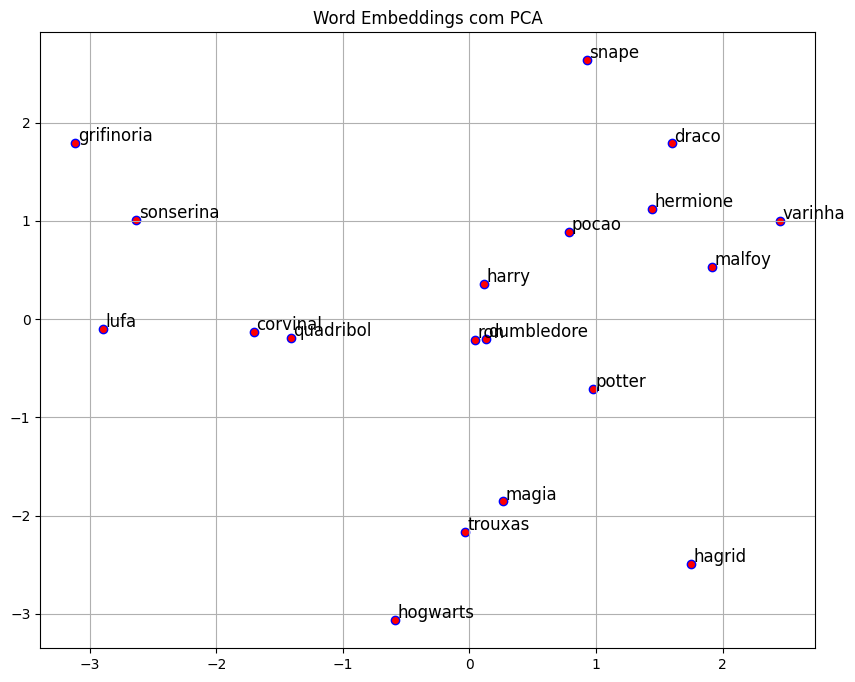

In [18]:
palavras_hp = [
    'harry', 'potter', 'ron', 'hermione', 'dumbledore', 'snape', 'draco',
    'varinha', 'pocao', 'trouxas', 'magia', 'quadribol', 'grifinoria', 
    'sonserina', 'corvinal', 'lufa', 'hogwarts', 'malfoy', 'hagrid'
]

plot_embeddings(model, palavras_hp)